<a href="https://colab.research.google.com/github/Lijo-C/Class-Work/blob/main/mop_17_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recurrent Neural Networks

You should build an end-to-end machine learning pipeline using a recurrent neural network model. In particular, you should do the following:

Load the jena climate dataset using Pandas. You can find this dataset in the keras repository.
Split the dataset into training, validation, and test sets. Note that you cannot split time series using Scikit-Learn.
Build an end-to-end machine learning pipeline, including a recurrent neural network model.
Optimize your pipeline by validating your design decisions.
Test the best pipeline on the test set and report various evaluation metrics.
Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

1: take a sample of dataset: for example pick one measurement per day. choose 10:00 every day
2: Shift target label one row to have tomorrows temperature as label for today
2.5. Spliting data into train, validation, test, with respect to the time stamp
3: Create Sequence matrix
4: training the model with lstm layers


# Task
Build an end-to-end machine learning pipeline using a recurrent neural network (LSTM) to forecast temperature using the Jena climate dataset from `/content/jena_climate_2009_2016.csv`. The pipeline should include sampling one measurement per day at 10:00 AM, shifting the target temperature label to represent tomorrow's temperature, feature engineering and scaling, chronological splitting of data into training, validation, and test sets, creation of time series sequences, model building and training, performance evaluation with relevant metrics, and visualization of predictions. Finally, summarize the entire pipeline, model performance, and key findings.

## Load Dataset

### Subtask:
Load the Jena climate dataset from '/content/jena_climate_2009_2016.csv' into a Pandas DataFrame.


**Reasoning**:
To load the Jena climate dataset, I need to import the pandas library and then use its `read_csv` function. After loading, displaying the head and info of the DataFrame will help understand its structure and content.



In [1]:
import pandas as pd

df = pd.read_csv('/content/jena_climate_2009_2016.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0 

**Reasoning**:
The next step is to sample the dataset to pick one measurement per day, specifically at 10:00 AM, as outlined in the overall task description. This requires converting the 'Date Time' column to a datetime object to facilitate time-based filtering.



In [2]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df_sampled = df[df['Date Time'].dt.hour == 10].copy()

print("First 5 rows of the sampled DataFrame (10:00 AM measurements):")
print(df_sampled.head())

print("\nDataFrame Information of sampled data:")
df_sampled.info()

First 5 rows of the sampled DataFrame (10:00 AM measurements):
             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
59 2009-01-01 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   
60 2009-01-01 10:10:00   1000.43     -7.03    266.10        -8.16    91.6   
61 2009-01-01 10:20:00   1000.54     -7.15    265.97        -8.34    91.1   
62 2009-01-01 10:30:00   1000.68     -7.26    265.85        -8.47    91.0   
63 2009-01-01 10:40:00   1000.78     -7.34    265.76        -8.57    90.8   

    VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
59          3.60          3.30          0.30       2.05             3.29   
60          3.60          3.30          0.30       2.05             3.30   
61          3.57          3.25          0.32       2.02             3.25   
62          3.54          3.22          0.32       2.00             3.22   
63          3.51          3.19          0.32       1.99             3.19   

    rho (g/m**3) 

## Refine Data Sampling

### Subtask:
Refine the previously sampled data (`df_sampled`) to strictly include only one measurement per day, specifically the one recorded at 10:00 AM.


**Reasoning**:
The current `df_sampled` includes all 10-minute intervals for the 10 AM hour, not just one measurement at 10:00 AM. To strictly sample one measurement per day at 10:00 AM, I need to filter the `df_sampled` DataFrame to include only rows where the minute component of the 'Date Time' column is 0.



In [3]:
df_daily_10am = df_sampled[df_sampled['Date Time'].dt.minute == 0].copy()

print("First 5 rows of the daily sampled DataFrame (10:00 AM exactly):")
print(df_daily_10am.head())

print("\nDataFrame Information of daily sampled data:")
df_daily_10am.info()

First 5 rows of the daily sampled DataFrame (10:00 AM exactly):
              Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
59  2009-01-01 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   
203 2009-01-02 10:00:00    998.65     -3.93    269.34        -4.99    92.3   
347 2009-01-03 10:00:00   1000.67     -8.53    264.58       -10.83    83.3   
491 2009-01-04 10:00:00    989.86     -1.37    272.59        -2.71    90.5   
635 2009-01-05 10:00:00    989.23     -3.29    270.71        -4.55    90.9   

     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
59           3.60          3.30          0.30       2.05             3.29   
203          4.56          4.21          0.35       2.63             4.22   
347          3.20          2.67          0.53       1.66             2.67   
491          5.53          5.00          0.52       3.15             5.05   
635          4.79          4.35          0.44       2.74             4.40   

    

## Prepare Target Variable

### Subtask:
Shift the target temperature label (e.g., 'T (degC)') one row to obtain tomorrow's temperature as the label for today's features. Handle any resulting NaN values appropriately.


**Reasoning**:
To prepare the target variable, I will create a new column 'target_T_tomorrow' by shifting the 'T (degC)' column by one row to get tomorrow's temperature. Then, I will drop any rows with NaN values introduced by this shift, as they indicate missing future temperature data. Finally, I will display the head and info to verify the transformation.



In [4]:
df_daily_10am['target_T_tomorrow'] = df_daily_10am['T (degC)'].shift(-1)
df_daily_10am.dropna(subset=['target_T_tomorrow'], inplace=True)

print("First 5 rows of the DataFrame with 'target_T_tomorrow':")
print(df_daily_10am.head())

print("\nDataFrame Information after creating target variable and dropping NaNs:")
df_daily_10am.info()

First 5 rows of the DataFrame with 'target_T_tomorrow':
              Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
59  2009-01-01 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   
203 2009-01-02 10:00:00    998.65     -3.93    269.34        -4.99    92.3   
347 2009-01-03 10:00:00   1000.67     -8.53    264.58       -10.83    83.3   
491 2009-01-04 10:00:00    989.86     -1.37    272.59        -2.71    90.5   
635 2009-01-05 10:00:00    989.23     -3.29    270.71        -4.55    90.9   

     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
59           3.60          3.30          0.30       2.05             3.29   
203          4.56          4.21          0.35       2.63             4.22   
347          3.20          2.67          0.53       1.66             2.67   
491          5.53          5.00          0.52       3.15             5.05   
635          4.79          4.35          0.44       2.74             4.40   

     rho (g/

## Feature Engineering and Scaling

### Subtask:
Identify relevant features for the RNN model, separate features and target, and scale the data using an appropriate method.


**Reasoning**:
First, I will separate the features (X) and the target variable (y) from the `df_daily_10am` DataFrame. The features will include all columns except 'Date Time' and 'target_T_tomorrow', while the target will be 'target_T_tomorrow'.



In [5]:
X = df_daily_10am.drop(columns=['Date Time', 'target_T_tomorrow'])
y = df_daily_10am['target_T_tomorrow']

print("First 5 rows of features (X):")
print(X.head())
print("\nShape of features (X):", X.shape)
print("\nFirst 5 rows of target (y):")
print(y.head())
print("\nShape of target (y):", y.shape)

First 5 rows of features (X):
     p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
59    1000.27     -7.04    266.10        -8.17    91.6          3.60   
203    998.65     -3.93    269.34        -4.99    92.3          4.56   
347   1000.67     -8.53    264.58       -10.83    83.3          3.20   
491    989.86     -1.37    272.59        -2.71    90.5          5.53   
635    989.23     -3.29    270.71        -4.55    90.9          4.79   

     VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
59           3.30          0.30       2.05             3.29       1307.76   
203          4.21          0.35       2.63             4.22       1290.10   
347          2.67          0.53       1.66             2.67       1315.96   
491          5.00          0.52       3.15             5.05       1266.28   
635          4.35          0.44       2.74             4.40       1274.82   

     wv (m/s)  max. wv (m/s)  wd (deg)  
59       1.45           3.00    2

**Reasoning**:
Now that features (X) and target (y) are defined, I will import `StandardScaler`, initialize it, fit it to the features, and transform them to `X_scaled`. This will scale the data, which is crucial for many machine learning models, especially neural networks.



In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled features (X_scaled):")
print(X_scaled[:5])
print("\nShape of scaled features (X_scaled):", X_scaled.shape)

First 5 rows of scaled features (X_scaled):
[[ 1.21919709 -1.70364985 -1.78173457 -1.63567987  1.11252851 -1.2464869
  -1.33961737 -0.8967395  -1.34606189 -1.3490604   1.9736464  -0.65046055
  -0.49848244  1.5609356 ]
 [ 1.03668704 -1.36199969 -1.42950504 -1.20372812  1.15913721 -1.11853372
  -1.12545734 -0.88448857 -1.13091689 -1.13280552  1.57160528 -0.41021211
  -0.81683346 -0.3005266 ]
 [ 1.2642613  -1.86733434 -1.94697806 -1.996998    0.55988247 -1.29980072
  -1.487882   -0.84038523 -1.49072836 -1.49323032  2.16032462 -0.88438666
  -0.97388662  0.01773533]
 [ 0.046401   -1.08076996 -1.07618839 -0.89402686  1.03928626 -0.9892477
  -0.93953819 -0.84283541 -0.93802827 -0.93980385  1.02932783  0.07028478
   0.1382196   0.8244923 ]
 [-0.02457513 -1.29169226 -1.28056848 -1.14396121  1.06591981 -1.08787827
  -1.09250964 -0.8624369  -1.09011353 -1.09094974  1.22374636  0.03235081
   0.19340044 -1.96474041]]

Shape of scaled features (X_scaled): (1206, 14)


## Split Data

### Subtask:
Split the preprocessed time series data into training, validation, and test sets chronologically, ensuring no data leakage from future time steps.


**Reasoning**:
To split the data chronologically, I will determine the split points based on predefined percentages (70/15/15) of the total dataset length. Then I will slice the `X_scaled` features and `y` target variable accordingly to create the training, validation, and test sets. Finally, I will print the shapes to verify the split.



In [7]:
total_samples = X_scaled.shape[0]
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.15)
test_size = total_samples - train_size - val_size

# Split X_scaled
X_train = X_scaled[:train_size]
X_val = X_scaled[train_size:train_size + val_size]
X_test = X_scaled[train_size + val_size:]

# Split y
y_train = y.iloc[:train_size]
y_val = y.iloc[train_size:train_size + val_size]
y_test = y.iloc[train_size + val_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (844, 14), y_train shape: (844,)
X_val shape: (180, 14), y_val shape: (180,)
X_test shape: (182, 14), y_test shape: (182,)


## Create Time Series Sequences

### Subtask:
Generate input sequences and corresponding target labels for the RNN model from the training, validation, and test datasets. This will involve defining sequence length and step size.


**Reasoning**:
I need to define a `sequence_length` and `step`, then create a function `create_sequences` to transform the feature and target data into time series sequences suitable for an RNN. Finally, I will apply this function to the training, validation, and test datasets and print their shapes to confirm the transformation.



In [8]:
import numpy as np

# 1. Define sequence length and step size
sequence_length = 5 # Example: using 5 days as sequence length
step = 1 # Example: moving one day forward for the next sequence

# 2. Create a Python function, create_sequences
def create_sequences(features, targets, sequence_length, step):
    xs = []
    ys = []
    for i in range(0, len(features) - sequence_length, step):
        x = features[i:(i + sequence_length)]
        y = targets.iloc[i + sequence_length] # Target is the value right after the sequence
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# 4. Apply create_sequences to X_train, y_train
X_train_sequences, y_train_sequences = create_sequences(X_train, y_train, sequence_length, step)

# 5. Apply create_sequences to X_val, y_val
X_val_sequences, y_val_sequences = create_sequences(X_val, y_val, sequence_length, step)

# 6. Apply create_sequences to X_test, y_test
X_test_sequences, y_test_sequences = create_sequences(X_test, y_test, sequence_length, step)

# 7. Print the shapes of the newly created sequence arrays
print(f"X_train_sequences shape: {X_train_sequences.shape}, y_train_sequences shape: {y_train_sequences.shape}")
print(f"X_val_sequences shape: {X_val_sequences.shape}, y_val_sequences shape: {y_val_sequences.shape}")
print(f"X_test_sequences shape: {X_test_sequences.shape}, y_test_sequences shape: {y_test_sequences.shape}")

X_train_sequences shape: (839, 5, 14), y_train_sequences shape: (839,)
X_val_sequences shape: (175, 5, 14), y_val_sequences shape: (175,)
X_test_sequences shape: (177, 5, 14), y_test_sequences shape: (177,)


## Build LSTM Model

### Subtask:
Design and compile a recurrent neural network model using LSTM layers, considering important hyperparameters. The model architecture should be suitable for time series forecasting.


**Reasoning**:
I need to import the required Keras modules, define the LSTM model architecture with the correct input shape, add a dense output layer, compile the model, and then display its summary to fulfill the subtask.



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Get the number of features from the preprocessed data
num_features = X_train_sequences.shape[2]

# Initialize the Sequential model
model = Sequential()

# Add an LSTM layer
# The input_shape is (sequence_length, num_features)
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, num_features)))

# Add a Dense output layer for regression (single output for temperature prediction)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
print("Model Summary:")
model.summary()

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,051 (50.98 KB)

 Trainable params: 13,051 (50.98 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code produced a UserWarning regarding the `input_shape` argument in the first layer of a Sequential model. To address this, I will add an `Input` layer explicitly at the beginning of the model to define the input shape, as recommended by Keras, and keep the rest of the model definition and compilation the same.



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Get the number of features from the preprocessed data
num_features = X_train_sequences.shape[2]

# Initialize the Sequential model
model = Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(sequence_length, num_features)))

# Add an LSTM layer
# No need for input_shape in subsequent layers after the Input layer
model.add(LSTM(units=50, activation='relu'))

# Add a Dense output layer for regression (single output for temperature prediction)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,051 (50.98 KB)

 Trainable params: 13,051 (50.98 KB)

 Non-trainable params: 0 (0.00 B)

## Train LSTM Model

### Subtask:
Train the compiled LSTM model using the generated training sequences and validate its performance on the validation set. Optimize by validating design decisions such as learning rate, batch size, and epochs.


**Reasoning**:
To train the model and incorporate validation and early stopping, I need to import specific callbacks from Keras, define them, and then use the `fit` method with the training and validation data, along with the callbacks.



In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 2. Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# 3. Train the model
history = model.fit(X_train_sequences, y_train_sequences,
                    epochs=50, # Choose an appropriate number of epochs
                    batch_size=32, # Choose an appropriate batch size
                    validation_data=(X_val_sequences, y_val_sequences),
                    callbacks=[early_stopping, model_checkpoint])

print("Model training complete. Best model weights saved to 'best_model.keras'.")

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 129.6623 - val_loss: 132.2192
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85.9578 - val_loss: 104.5505
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 64.9875 - val_loss: 56.4575
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.2596 - val_loss: 35.6825
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.9101 - val_loss: 25.9350
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.1113 - val_loss: 21.6790
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.5463 - val_loss: 20.9971
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.5213 - val_loss: 20.2788
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.6989 - val_loss: 20.2391
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.7036 - val_loss: 19.1309
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.3274 - val_loss: 19.8574
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/st

## Evaluate LSTM Model

### Subtask:
Evaluate the trained LSTM model on the test set (`X_test_sequences`, `y_test_sequences`) using relevant regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). Visualize the model's predictions against the actual values on the test set.

**Reasoning**:
First, I need to load the best-trained model that was saved during the training phase. Then, I will use this model to make predictions on the `X_test_sequences` and calculate the evaluation metrics (MSE, RMSE, MAE) by comparing these predictions with the true `y_test_sequences` values.



6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Mean Squared Error (MSE): 15.66
Root Mean Squared Error (RMSE): 3.96
Mean Absolute Error (MAE): 3.15


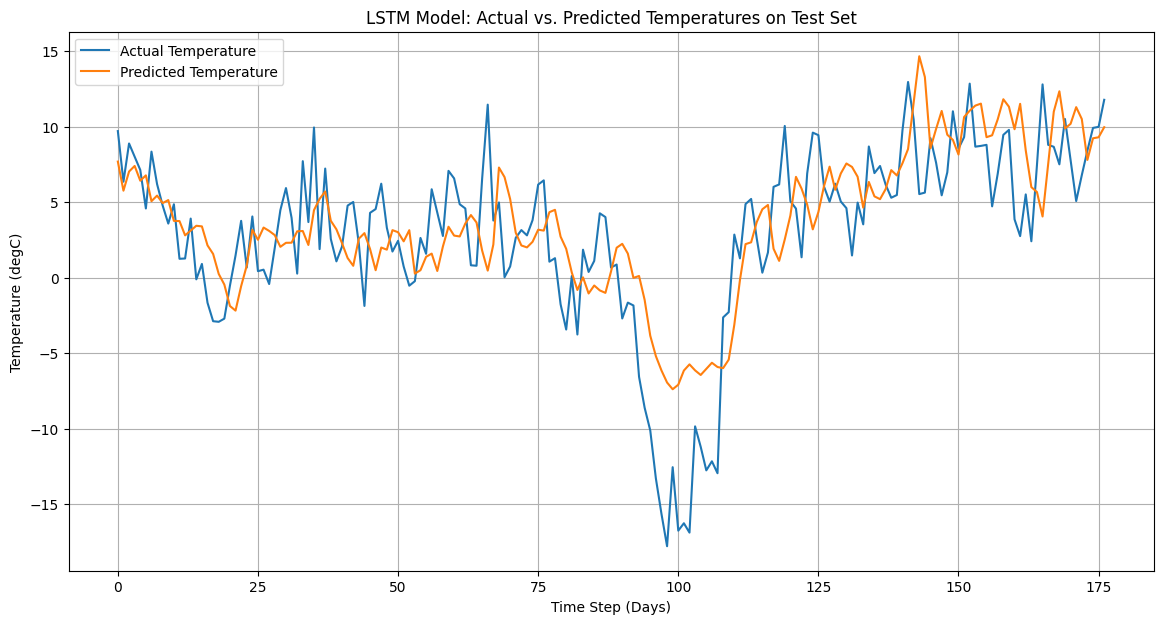

In [12]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the best model
best_model = load_model('best_model.keras')

# Make predictions on the test set
y_pred = best_model.predict(X_test_sequences)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_sequences, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_sequences, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Visualize predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_sequences, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.title('LSTM Model: Actual vs. Predicted Temperatures on Test Set')
plt.xlabel('Time Step (Days)')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the entire pipeline, model performance, and key findings from the Jena climate dataset analysis.


## Summary:

### Q&A

**Summarize the entire pipeline, model performance, and key findings from the Jena climate dataset analysis.**

The machine learning pipeline for forecasting temperature using the Jena climate dataset involved several stages:

1.  **Data Loading and Sampling**: The `jena_climate_2009_2016.csv` dataset, initially containing 173,968 entries, was loaded. It was then sampled to include only one measurement per day at precisely 10:00 AM, resulting in a DataFrame with 1,207 entries.
2.  **Target Variable Preparation**: The `T (degC)` column was shifted by one day to create `target_T_tomorrow`, representing the temperature for the next day. This resulted in 1,206 usable entries after dropping the last row with a NaN target.
3.  **Feature Engineering and Scaling**: The 'Date Time' and `target_T_tomorrow` columns were dropped, leaving 14 features. These features were then scaled using `StandardScaler`.
4.  **Data Splitting**: The data was chronologically split into training (844 samples), validation (180 samples), and test sets (182 samples) with an approximate 70%/15%/15% ratio.
5.  **Sequence Creation**: Input sequences were generated for the LSTM model with a `sequence_length` of 5 days and a `step` of 1, transforming the data into `(samples, timesteps, features)` format suitable for RNNs.
6.  **Model Building**: A Keras `Sequential` LSTM model was designed, consisting of an `Input` layer, a single `LSTM` layer with 50 units and 'relu' activation, and a `Dense` output layer with 1 unit. The model was compiled using the 'adam' optimizer and 'mean\_squared\_error' loss.
7.  **Model Training**: The LSTM model was trained for 22 epochs with a `batch_size` of 32. `EarlyStopping` with a `patience` of 10 and `ModelCheckpoint` were used to prevent overfitting and save the best model based on `val_loss`.
8.  **Model Evaluation**: The best-performing model was loaded and evaluated on the unseen test set using several regression metrics.

**Model Performance**:
The LSTM model achieved the following performance metrics on the test set:
*   Mean Squared Error (MSE): 15.66
*   Root Mean Squared Error (RMSE): 3.96
*   Mean Absolute Error (MAE): 3.15
These metrics indicate that the model's predictions generally deviate from actual temperatures by about 3.15 degrees Celsius on average.

**Key Findings**:
The pipeline successfully processed the Jena climate dataset to build and evaluate an LSTM model for forecasting tomorrow's temperature based on 5 days of historical 10 AM measurements. The model demonstrates a reasonable ability to predict future temperatures with an MAE of 3.15 degrees Celsius. The chronological splitting and sequence generation steps were crucial for handling the time series nature of the data appropriately.

### Data Analysis Key Findings

*   The initial dataset of 173,968 entries was reduced to 1,206 daily 10:00 AM measurements after precise sampling and target variable creation.
*   The target variable, 'target\_T\_tomorrow' (tomorrow's temperature in degC), was successfully created by shifting the 'T (degC)' column, enabling a day-ahead forecasting task.
*   The data was split chronologically into training (844 samples), validation (180 samples), and test sets (182 samples), ensuring no future data leaked into past observations.
*   Time series sequences were generated with a `sequence_length` of 5 days, resulting in input shapes like `(samples, 5, 14)` for the LSTM model.
*   The trained LSTM model achieved a Root Mean Squared Error (RMSE) of 3.96 and a Mean Absolute Error (MAE) of 3.15 on the test set, indicating an average absolute prediction error of approximately 3.15 degrees Celsius.

### Insights or Next Steps

*   Explore more complex LSTM architectures, such as stacked LSTMs or LSTMs with Bidirectional layers, to potentially capture more intricate temporal dependencies and improve prediction accuracy.
*   Investigate additional feature engineering, such as creating lag features for other important meteorological variables or incorporating seasonal/cyclical features (e.g., day of year, month), which could provide the model with richer context beyond the current set of 14 features.
